# 総合実験（２日目）

## 〜 IPython Notebook (Jupyter Notebook)を使った大規模データの可視化 〜

### IPython Notebook とは
* Python という名のプログラミング言語が使えるプログラミング環境。計算コードと計算結果を同じ場所に時系列で保存できるので、実験系における実験ノートのように、いつどんな処理を行って何を得たのか記録して再現するのに便利。
* [Jupyter Notebook（IPython）のインストールと始め方](http://www.task-notes.com/entry/20151129/1448794509)
* [小寺研究室](https://github.com/maskot1977/-/blob/master/L1%E3%82%BC%E3%83%9F2015%E5%B0%8F%E5%AF%BA%E7%A0%94%E7%A9%B6%E5%AE%A4.pptx.pdf) では、MacOSX上で右記のようにセットアップして使っています。> [環境構築](https://sites.google.com/site/masaakikotera/8-python/8-1-huan-jing-gou-zhu)

### 前回の復習
* 前回の内容を忘れてしまった人は[総合実験（１日目）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E7%B7%8F%E5%90%88%E5%AE%9F%E9%A8%93%EF%BC%91%E6%97%A5%E7%9B%AE.ipynb) を見てください。

### 本実習スタート
* 本実習ではまず、下のプログラムを順次実行してもらいます。各自の画面中の IPython Notebook のセルに順次入力して（コピペ可）、「Shift + Enter」してください。
* 最後に、課題を解いてもらいます。課題の結果を、指定する方法で指定するメールアドレスまで送信してください。

In [1]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib

### 簡単な折れ線グラフで時系列変化を図示する。

In [3]:
# ウェブ上のリソースを指定する
url = 'https://dl.dropboxusercontent.com/u/432512/20120210/data/airmiles.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'airmiles.txt')

('airmiles.txt', <httplib.HTTPMessage instance at 0x10c6ba4d0>)

In [4]:
# ダウンロードしたファイルの冒頭だけ表示して中身を確認する
!head airmiles.txt

In [5]:
# ダウンロードしたファイルから、2つの列の数字をそれぞれリストに入れる。
x = []
y = []
for i, line in enumerate(open('airmiles.txt')):
    a = line.split()
    x.append(int(a[0]))
    y.append(int(a[1]))

In [6]:
# リストの中身を確認する。
print x
print y

[1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960]
[412, 480, 683, 1052, 1385, 1418, 1634, 2178, 3362, 5948, 6109, 5981, 6753, 8003, 10566, 12528, 14760, 16769, 19819, 22362, 25340, 25343, 29269, 30514]


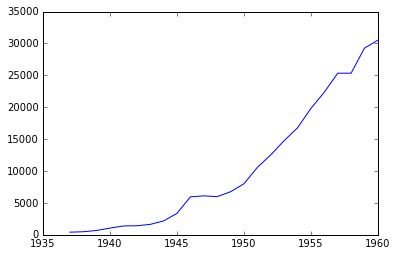

In [7]:
# とりあえず可視化してみる。
plt.plot(x,y)

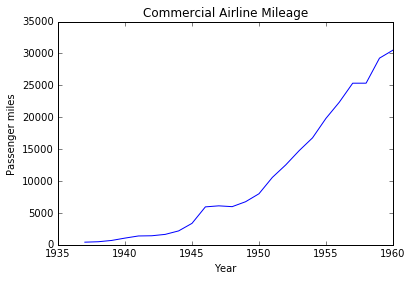

In [8]:
#もうちょっとカッコ良くする
plt.plot(x,y)
plt.title('Commercial Airline Mileage')
plt.xlabel('Year')
plt.ylabel('Passenger miles')
plt.show()

上図を「図１」と呼ぶことにします。課題１で、似たような図を作成してもらいます。

## 複数のデータの時系列を図示する

In [9]:
# ウェブ上のリソースを指定する
url = 'https://dl.dropboxusercontent.com/u/432512/20120210/data/airquality.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'airquality.txt')

('airquality.txt', <httplib.HTTPMessage instance at 0x10f036cf8>)

In [10]:
# ダウンロードしたファイルの冒頭だけ表示して中身を確認する
!head airquality.txt

In [11]:
# ダウンロードしたファイルから、それぞれの列の数字をリストに入れる。日付の情報は日付のオブジェクトに変換してリストに入れる。
import datetime
ozone = []
solar = []
wind = []
temp = []
date = []
for i, line in enumerate(open('airquality.txt')):
    if i == 0:
        continue
    else:
        a = line.split()
        if 'NA' in a:
            continue
        ozone.append(int(a[1]))
        solar.append(int(a[2]))
        wind.append(float(a[3]))
        temp.append(int(a[4]))
        month = int(a[5])
        day = int(a[6])
        date.append(datetime.datetime(1973, month, day))

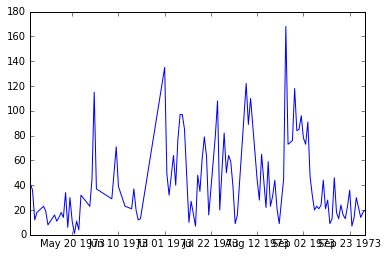

In [12]:
# まずは一種類のデータだけ図示してみる。
plt.plot(date, ozone)

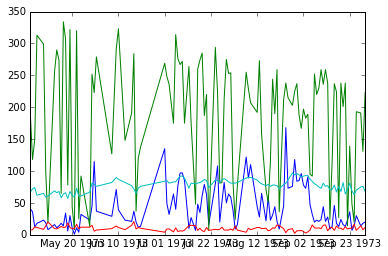

In [13]:
# すべてのデータを図示してみる。
plt.plot(date, ozone)
plt.plot(date, solar)
plt.plot(date, wind)
plt.plot(date, temp)
plt.show()

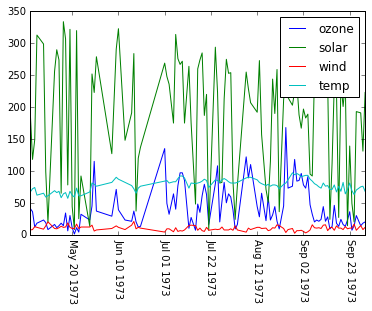

In [14]:
# もうちょっとカッコよくしてみる。
plt.plot(date, ozone, label='ozone')
plt.plot(date, solar, label='solar')
plt.plot(date, wind, label='wind')
plt.plot(date, temp, label='temp')
plt.legend()
plt.xticks(rotation=270)
plt.show()

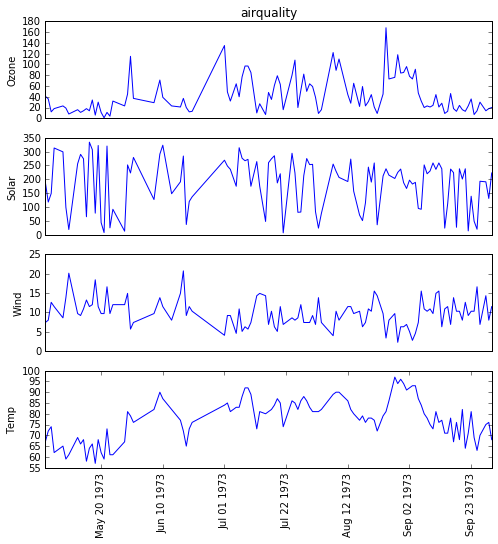

In [15]:
# さらに見やすくしてみる
plt.figure(figsize=(8, 8))

plt.subplot(4, 1, 1)
plt.plot(date, ozone)
plt.title('airquality')
plt.xticks([])
plt.ylabel('Ozone')

plt.subplot(4, 1, 2)
plt.plot(date, solar)
plt.xticks([])
plt.ylabel('Solar')

plt.subplot(4, 1, 3)
plt.plot(date, wind)
plt.xticks([])
plt.ylabel('Wind')

plt.subplot(4, 1, 4)
plt.plot(date, temp)
plt.xticks(rotation=90)
plt.ylabel('Temp')

上図を「図２」と呼ぶことにします。課題２で、似たような図を作成してもらいます。

### 箱ひげ図（ボックスプロット）とバイオリンプロットを作成する

前回の[総合実験（１日目）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E7%B7%8F%E5%90%88%E5%AE%9F%E9%A8%93%EF%BC%91%E6%97%A5%E7%9B%AE.ipynb) で使ったものと同じデータから、ボックスプロットとバイオリンプロットを描いてもらいます。
* 「箱ひげ図」（ボックスプロット）とは何か？知らない人は右記参照→ http://excelshogikan.com/qc/qc03/boxplot.html

In [16]:
# ウェブ上のリソースを指定する
url = 'https://dl.dropboxusercontent.com/u/432512/20120210/data/iris.txt'

In [17]:
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'iris.txt')

('iris.txt', <httplib.HTTPMessage instance at 0x10f765d40>)

In [18]:
# ダウンロードしたファイルの冒頭だけ表示して中身を確認する
!head iris.txt

In [19]:
# ダウンロードしたファイルから、４つの列の数字をそれぞれ４つのリストに入れる。
x1 = []
x2 = []
x3 = []
x4 = []
for i, line in enumerate(open('iris.txt')):
    if i == 0:
        continue
    else:
        a = line.split()
        x1.append(float(a[1]))
        x2.append(float(a[2]))
        x3.append(float(a[3]))
        x4.append(float(a[4]))

(array([  9.,  23.,  14.,  27.,  22.,  20.,  18.,   6.,   5.,   6.]),
 array([ 4.3 ,  4.66,  5.02,  5.38,  5.74,  6.1 ,  6.46,  6.82,  7.18,
         7.54,  7.9 ]),
 <a list of 10 Patch objects>)

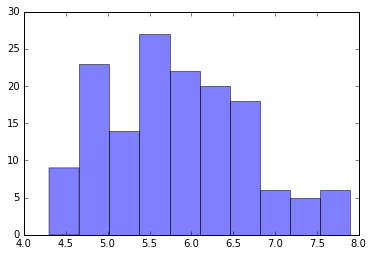

In [20]:
# x1のヒストグラム
plt.hist(x1, alpha=0.5)

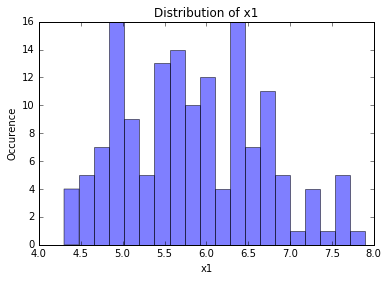

In [21]:
#もう少しカッコ良くする
plt.hist(x1, bins=20, alpha=0.5)
plt.title('Distribution of x1')
plt.xlabel('x1')
plt.ylabel('Occurence')
plt.show()

上記のヒストグラムを「図３」と呼ぶことにします。課題３で、似たような図を作成してもらいます。

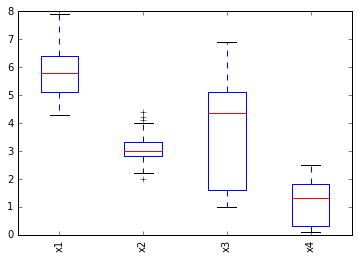

In [22]:
# 箱ひげ図 （ボックスプロット）
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([x1, x2, x3, x4])
ax.set_xticklabels(['x1', 'x2', 'x3', 'x4'], rotation=90)
plt.show()

上記のボックスプロットを「図4」と呼ぶことにします。課題４で、似たような図を作成してもらいます。

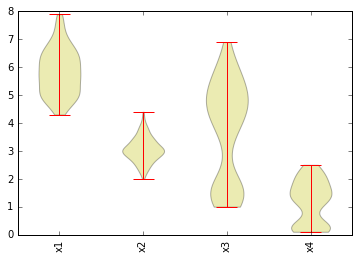

In [23]:
# バイオリンプロット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.violinplot([x1, x2, x3, x4])
ax.set_xticks([1, 2, 3, 4]) #データ範囲のどこに目盛りが入るかを指定する
ax.set_xticklabels(['x1', 'x2', 'x3', 'x4'], rotation=90)
plt.show()

上記のバイオリンプロットを「図5」と呼ぶことにします。課題5で、似たような図を作成してもらいます。

### ノード（点）のサイズや色に意味をもたせた散布図を作成する

In [24]:
# ウェブ上のリソースを指定する
url = 'https://dl.dropboxusercontent.com/u/432512/20120210/data/USArrests.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'USArrests.txt')

('USArrests.txt', <httplib.HTTPMessage instance at 0x10f19d488>)

In [25]:
!head USArrests.txt

In [26]:
# ダウンロードしたファイルから、2つの列の数字をそれぞれ４つのリストに入れる。
import datetime
state = []
murder = []
assault = []
urbanpop = []
rape = []
for i, line in enumerate(open('USArrests.txt')):
    if i == 0:
        continue
    else:
        a = line.split('\t')
        state.append(a[0])
        murder.append(float(a[1]))
        assault.append(int(a[2]))
        urbanpop.append(int(a[3]))
        rape.append(float(a[4]))

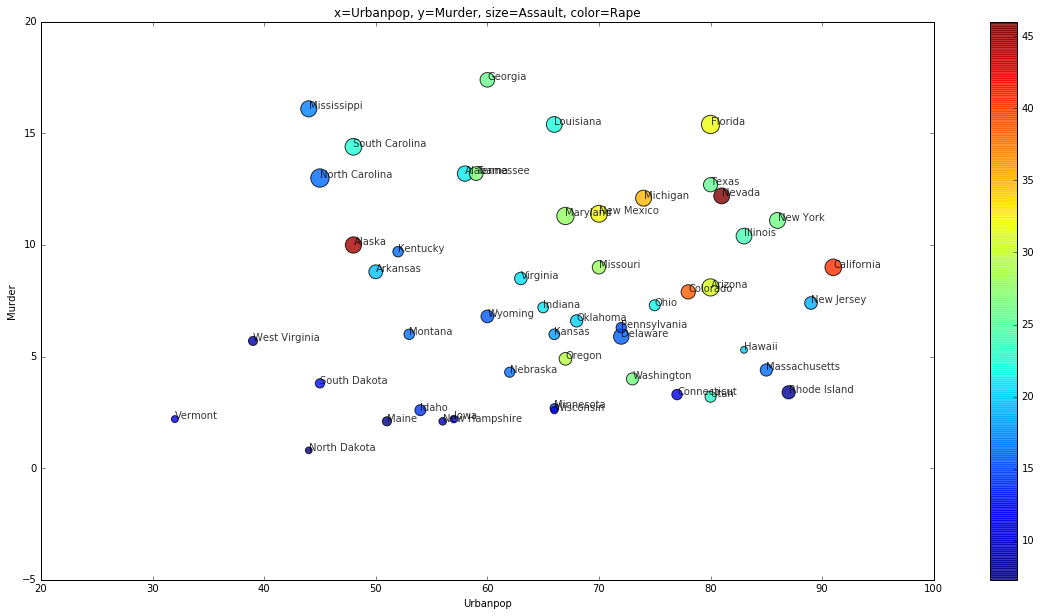

In [27]:
# ノード（点）のサイズや色に意味をもたせた散布図を作成する
names = state
x_axis = urbanpop
y_axis = murder
sizes = assault
colors = rape

name_label = "States"
x_label = "Urbanpop"
y_label = "Murder"
size_label = "Assault"
color_label = "Rape"

plt.figure(figsize=(20, 10))
for x, y, name in zip(x_axis, y_axis, names):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(x_axis, y_axis, s=sizes, c=colors, alpha=0.8)
plt.colorbar(alpha=0.8)
plt.title("x=%s, y=%s, size=%s, color=%s" % (x_label, y_label, size_label, color_label))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

上図を「図6」と呼ぶことにします。課題6で、似たような図を作成してもらいます。

### 最後に、Scatter Matrix でデータの全体像を眺めてみましょう。
（本来は、最初にやるべきことですが、、、）

In [28]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd # データフレームワーク処理のライブラリをインポート
from pandas.tools import plotting # 高度なプロットを行うツールのインポート

In [29]:
df = pd.read_csv('airquality.txt', sep='\t', na_values=".") # データの読み込み

In [30]:
pd.DataFrame(df).head() # 先頭N行を表示する。カラムのタイトルも確認する。

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41,190,7.4,67,5,1
1,2,36,118,8.0,72,5,2
2,3,12,149,12.6,74,5,3
3,4,18,313,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


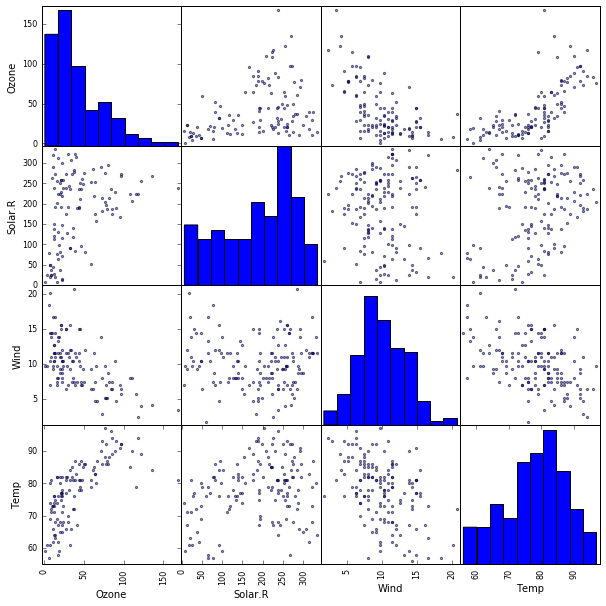

In [31]:
# 下記の関数にカラム名を入力すれば、Scatter Matrix が表示されます。
plotting.scatter_matrix(df[['Ozone', 'Solar.R', 'Wind', 'Temp']], figsize=(10, 10)) 
plt.show()

上図を「図7」と呼ぶことにします。課題7で、似たような図を作成してもらいます。

----------
## 課題
新しいノートを開いて、以下の課題を解いてください。

* __課題1__：下記リンクのデータを用いて、図1のような折れ線グラフを描いてください。
https://dl.dropboxusercontent.com/u/432512/20120210/data/discoveries.txt

* __課題2__：図２を描き変えて、OzoneとSolar、WindとTempをそれぞれ入れ替えた図にしてください。

* __課題3__： 下記リンクのデータを用いて、図３のようなヒストグラムを作成してください。
https://dl.dropboxusercontent.com/u/432512/20120210/data/islands.txt

* __課題4__：下記リンクのデータを用いて、Murder, Assault, UrbanPop, Rape について図４のようなボックスプロットを作成してください。
https://dl.dropboxusercontent.com/u/432512/20120210/data/USArrests.txt

* __課題5__：下記リンクのデータを用いて、Murder, Assault, UrbanPop, Rape について図5のようなバイオリンプロットを作成してください。
https://dl.dropboxusercontent.com/u/432512/20120210/data/USArrests.txt

* __課題6__：図6を描き変えて、横軸をMurder, 縦軸をAssault, サイズをUrbanPop, 色をRapeにした図にしてください。

* __課題7__：下記リンクのデータを用いて、Murder, Assault, UrbanPop, Rape について図7のような Scatter Matrix を描いてください。
https://dl.dropboxusercontent.com/u/432512/20120210/data/USArrests.txt

以上の結果を [自分の氏名].ipynb ファイルとして保存し、指定したアドレスまでメールしてください。メールタイトルは「総合実験２日目」とし、メール本文に学籍番号と氏名を明記のこと。

お疲れ様でした。もし時間が余ったら、[総合実験３日目](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E7%B7%8F%E5%90%88%E5%AE%9F%E9%A8%93%EF%BC%93%E6%97%A5%E7%9B%AE.ipynb)に進んでもらって結構です。